# DSCI 550 Assignment 1

In [ ]:
!python --version

Python 3.11.11


In [ ]:
# !pwd

## Installations

In [ ]:
!pip install tika
!pip install install-jdk
!pip install libmagic
!pip install csvkit

!git clone https://github.com/chrismattmann/etllib.git
%cd etllib
!python setup.py install

%cd ..
!git clone https://github.com/chrismattmann/tika-similarity
!pip install tika editdistance
!wget https://downloads.apache.org/tika/3.1.0/tika-server-standard-3.1.0.jar -O tika-server.jar


  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32624 sha256=308eef1d6e9869a7cd653f8137ef3d14c2d92b7055b348311c8dcc57c5929285
  Stored in directory: /root/.cache/pip/wheels/27/ba/2f/37420d1191bdae5e855d69b8e913673045bfd395cbd78ad697
Successfully built tika
  Preparing metadata (setup.py) ... done
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=ea5357a4908206839c44428c315330425899fe96871b0f84a1427d3539134db9
  Stored in directory: /root/.cache/pip/wheels/3e/35/13/53c696ff5f3523479505ec5ed4156198671fb598fe678178bf
Successfully built libmagic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.1 MB/s eta 0:00:00
Cloning into 'etllib'...
remote: Enumerat

## Imports

In [ ]:
import pandas as pd
import tika
import tensorflow as tf
import jdk

## Dataset

In [ ]:
df = pd.read_csv("./haunted_religious_historic_crime_merged.tsv", sep='\t')
# df = pd.read_csv("./haunted_places.csv")
df.head()

Unnamed: 0     city        country  \
0           0      Ada  United States   
1           1  Addison  United States   
2           2   Adrian  United States   
3           3   Adrian  United States   
4           4   Albion  United States   

                                         description  \
0  Ada witch - Sometimes you can see a misty blue...   
1  A little girl was killed suddenly while waitin...   
2  If you take Gorman Rd. west towards Sand Creek...   
3  In the 1970's, one room, room 211, in the old ...   
4  Kappa Delta Sorority - The Kappa Delta Sororit...   

                   location     state state_abbrev  longitude   latitude  \
0              Ada Cemetery  Michigan           MI -85.504893  42.962106   
1           North Adams Rd.  Michigan           MI -84.381843  41.971425   
2             Ghost Trestle  Michigan           MI -84.035656  41.904538   
3  Siena Heights University  Michigan           MI -84.017565  41.905712   
4            Albion College  Michigan           MI -84.745177  42.244006   

   city_longitude  ...  Adherents  Adherents as % of Population  \
0      -85.495480  ...   282420.0                      0.429227   
1      -84.347168  ...    11128.0                      0.243256   
2      -84.037166  ...    33427.0                      0.336210   
3      -84.037166  ...    33427.0                      0.336210   
4      -84.753030  ...    43340.0                      0.322686   

   Haunted Houses Count per County crime_rate_per_100000  MURDER ROBBERY  \
0                             46.0            395.689239    22.0   639.0   
1                              3.0            190.885230     0.0     2.0   
2                              3.0            205.670041     4.0    22.0   
3                              3.0            205.670041     4.0    22.0   
4                             19.0            602.168696    11.0   112.0   

  BURGLRY                           nearest_historical_place  \
0  3878.0                                 Ada Covered Bridge   
1   180.0                                                NaN   
2   335.0                          Lenawee County Courthouse   
3   335.0  Dennis and State Streets Historic District (Bo...   
4  1405.0       Superior Street Commercial Historic District   

   num_historical_places_5mi  year_of_nearest_historical_place  
0                          2                            1970.0  
1                          0                               NaN  
2                         12                            1991.0  
3                         12                            1979.0  
4                          2                            1997.0  

[5 rows x 52 columns]

In [ ]:
df.dtypes

Unnamed: 0                                     int64
city                                          object
country                                       object
description                                   object
location                                      object
state                                         object
state_abbrev                                  object
longitude                                    float64
latitude                                     float64
city_longitude                               float64
city_latitude                                float64
audio evidence                                  bool
image/video/visual evidence                     bool
haunted places date                           object
haunted places witness count                   int64
time of day                                   object
apparition type                               object
event type                                    object
binge drinking rate (%)                      float64
median drinks per binge (overall)            float64
median drinks per binge (25% most active)    float64
binge frequency (monthly overall)            float64
binge frequency (monthly 25% most active)    float64
annual deaths                                float64
5-year excess death increase (%)             float64
death ratio (1 per x adults)                 float64
deaths per 10k adults                        float64
% male deaths                                float64
% chronic causes deaths                      float64
% deaths in adults 35+                       float64
% under 21 deaths                            float64
cdc years of potential life lost             float64
taxpayer spending 2010 (billion usd)         float64
adjusted spending 2022 (billion usd)         float64
cost per drink (usd)                         float64
Avg_Daylight_Hours                           float64
Sunrise_Variability                          float64
Daylight_Hours_Range                         float64
geometry                                      object
index_right                                  float64
county                                        object
2020 Population                              float64
Adherents                                    float64
Adherents as % of Population                 float64
Haunted Houses Count per County              float64
crime_rate_per_100000                        float64
MURDER                                       float64
ROBBERY                                      float64
BURGLRY                                      float64
nearest_historical_place                      object
num_historical_places_5mi                      int64
year_of_nearest_historical_place             float64
dtype: object

In [ ]:
# from number_parser import parse
# import datefinder
# # from datetime import datetime

# def number_parse(description):
#     return parse(description)

# def haunted_date(description):
#     dates = list(datefinder.find_dates(description))
#     if dates:
#         return dates[0].strftime('%Y/%m/%d')
#     else:
#         return '2025/01/01'

# df['Num_Description'] = df['description'].apply(number_parse)
# df['Haunted Places Date'] = df['Num_Description'].apply(haunted_date)

# df.head()

In [ ]:
h = ','.join(list(df))
h = h.replace(",", "\n")
print(h)

Unnamed: 0
city
country
description
location
state
state_abbrev
longitude
latitude
city_longitude
city_latitude
audio evidence
image/video/visual evidence
haunted places date
haunted places witness count
time of day
apparition type
event type
binge drinking rate (%)
median drinks per binge (overall)
median drinks per binge (25% most active)
binge frequency (monthly overall)
binge frequency (monthly 25% most active)
annual deaths
5-year excess death increase (%)
death ratio (1 per x adults)
deaths per 10k adults
% male deaths
% chronic causes deaths
% deaths in adults 35+
% under 21 deaths
cdc years of potential life lost
taxpayer spending 2010 (billion usd)
adjusted spending 2022 (billion usd)
cost per drink (usd)
Avg_Daylight_Hours
Sunrise_Variability
Daylight_Hours_Range
geometry
index_right
county
2020 Population
Adherents
Adherents as % of Population
Haunted Houses Count per County
crime_rate_per_100000
MURDER
ROBBERY
BURGLRY
nearest_historical_place
num_historical_places_5mi
year_

In [ ]:
# Assuming df is your DataFrame
df['synthetic_text'] = df.apply(lambda row:
    f"City: {row['city']}, Country: {row['country']}, "
    f"Location: {row['location']}, State: {row['state']}, State Abbreviation: {row['state_abbrev']}, "
    f"Longitude: {row['longitude']}, Latitude: {row['latitude']}, City Longitude: {row['city_longitude']}, "
    f"City Latitude: {row['city_latitude']}, Audio Evidence: {row['audio evidence']}, "
    f"Visual Evidence: {row['image/video/visual evidence']}, Haunted Places Date: {row['haunted places date']}, "
    f"Witness Count: {row['haunted places witness count']}, Time of Day: {row['time of day']}, "
    f"Apparition Type: {row['apparition type']}, Event Type: {row['event type']}, "
    f"Binge Drinking Rate: {row['binge drinking rate (%)']}, Median Drinks per Binge (Overall): {row['median drinks per binge (overall)']}, "
    f"Median Drinks per Binge (25% Most Active): {row['median drinks per binge (25% most active)']}, "
    f"Binge Frequency (Monthly Overall): {row['binge frequency (monthly overall)']}, "
    f"Binge Frequency (Monthly 25% Most Active): {row['binge frequency (monthly 25% most active)']}, "
    f"Annual Deaths: {row['annual deaths']}, 5-Year Excess Death Increase: {row['5-year excess death increase (%)']}, "
    f"Death Ratio: {row['death ratio (1 per x adults)']}, Deaths per 10k Adults: {row['deaths per 10k adults']}, "
    f"% Male Deaths: {row['% male deaths']}, % Chronic Causes Deaths: {row['% chronic causes deaths']}, "
    f"% Deaths in Adults 35+: {row['% deaths in adults 35+']}, % Under 21 Deaths: {row['% under 21 deaths']}, "
    f"CDC Years of Potential Life Lost: {row['cdc years of potential life lost']}, "
    f"Taxpayer Spending 2010: {row['taxpayer spending 2010 (billion usd)']}, "
    f"Adjusted Spending 2022: {row['adjusted spending 2022 (billion usd)']}, Cost per Drink: {row['cost per drink (usd)']}, "
    f"Average Daylight Hours: {row['Avg_Daylight_Hours']}, Sunrise Variability: {row['Sunrise_Variability']}, "
    f"Daylight Hours Range: {row['Daylight_Hours_Range']}, County: {row['county']}, 2020 Population: {row['2020 Population']}, "
    f"Adherents: {row['Adherents']}, Adherents as % of Population: {row['Adherents as % of Population']}, "
    f"Haunted Houses Count per County: {row['Haunted Houses Count per County']}, Crime Rate per 100k: {row['crime_rate_per_100000']}, "
    f"Murder: {row['MURDER']}, Robbery: {row['ROBBERY']}, Burglary: {row['BURGLRY']}, "
    f"Nearest Historical Place: {row['nearest_historical_place']}, Number of Historical Places within 5mi: {row['num_historical_places_5mi']}, "
    f"Year of Nearest Historical Place: {row['year_of_nearest_historical_place']}",
    axis=1
)

# Display the DataFrame with synthetic_text
df['synthetic_text']

0        City: Ada, Country: United States, Location: A...
1        City: Addison, Country: United States, Locatio...
2        City: Adrian, Country: United States, Location...
3        City: Adrian, Country: United States, Location...
4        City: Albion, Country: United States, Location...
                               ...                        
10969    City: Westminster, Country: United States, Loc...
10970    City: Westminster, Country: United States, Loc...
10971    City: Wheat Ridge, Country: United States, Loc...
10972    City: Wheat Ridge, Country: United States, Loc...
10973    City: Woodland Park, Country: United States, L...
Name: synthetic_text, Length: 10974, dtype: object

## Tika

In [ ]:
df = df['synthetic_text'][0:100]

In [ ]:
# df.to_csv('./joined1.tsv',sep = "\t", index=False)
df.to_csv('./haunted_places.tsv',sep = "\t", index=False)

In [ ]:
# !tsvtojson -t ./joined1.tsv -j ./aggregate.json -c ./colheaders.conf -o haunted -e ./encoding.conf -s 0.8 -v
!tsvtojson -t ./haunted_places.tsv -j ./aggregate.json -c ./colheaders.conf -o haunted -e ./encoding.conf -s 0.8 -v

['utf-8', 'us-asci']
['synthetic_text']
Deduping list of structs. Count: [10975]
After dedup. Count: [10975]
Near duplicates detection.
Filtered 0 near duplicates.
After near duplicates. Count: [10974]
Writing output file: [./aggregate.json]


In [ ]:
!mkdir JSON
%cd JSON

/content/JSON


In [ ]:
!repackage -j ../aggregate.json -o haunted

In [ ]:
# !java -jar /content/tika-server.jar --port 9998

In [ ]:
%cd ..

/content


## Jaccard

In [ ]:
!python ./tika-similarity/tikasimilarity/distance/jaccard_similarity.py --inputDir ./JSON/ --outCSV ./Jaccard_Sim.csv

Accepting all MIME Types.....
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 294, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.Rem

In [ ]:
!python ./tika-similarity/tikasimilarity/cluster/edit-cosine-cluster.py --inputCSV ./Jaccard_Sim.csv --cluster 2

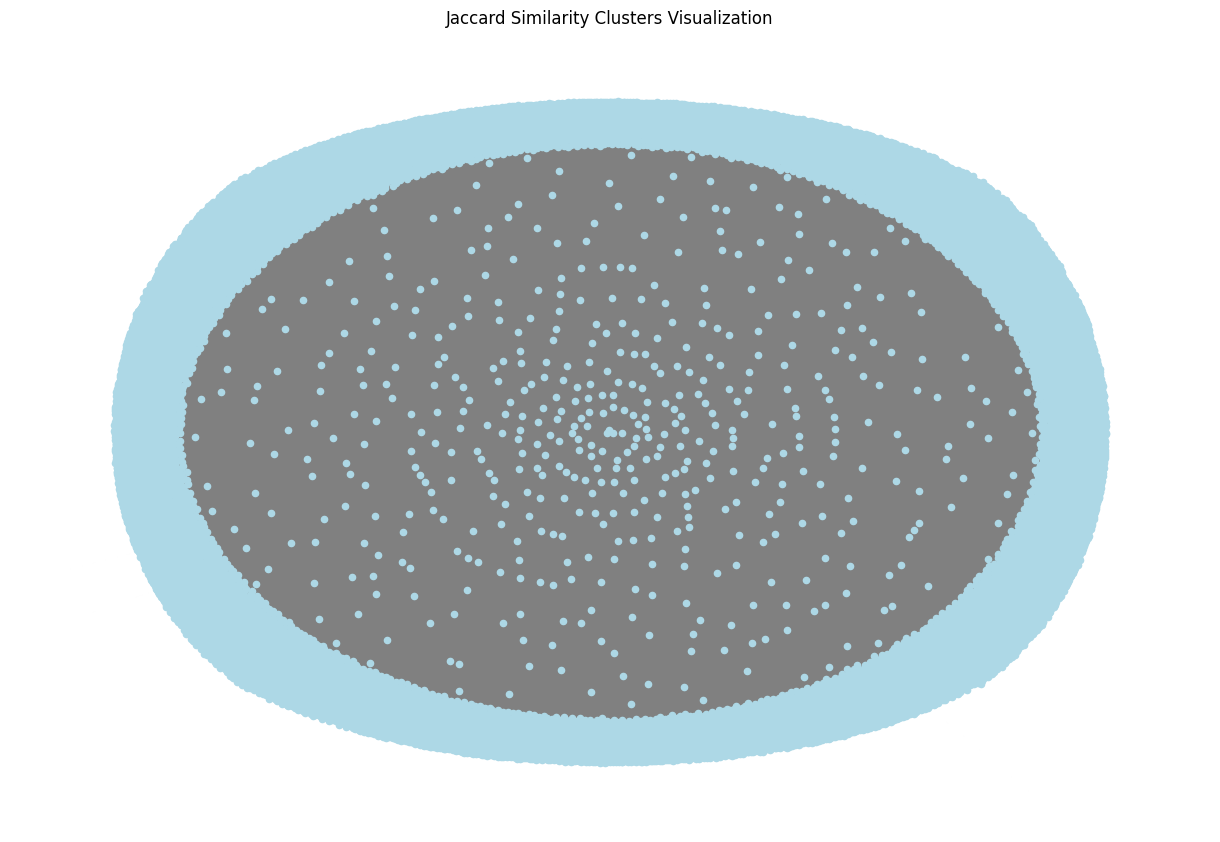

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load clusters.json
with open("clusters.json", "r") as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Recursive function to add nodes and edges
def add_edges(node, parent=None):
    if "name" in node:
        G.add_node(node["name"])
        if parent:
            G.add_edge(parent, node["name"])

    if "children" in node:
        for child in node["children"]:
            add_edges(child, node["name"])

# Start adding nodes from the root
add_edges(data)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes dynamically
nx.draw(G, pos, node_color="lightblue", edge_color="gray", node_size=20)

plt.title("Jaccard Similarity Clusters Visualization")
plt.show()


In [ ]:
# !open ./tika-img-similarity/html/dynamic-circlepacking.html

In [ ]:
# !python ./tika-img-similarity/tikasimilarity/distance/jaccard_similarity.py --inputDir /content/JSON/ --outCSV /content/Jaccard_Sim.csv

## Cosine Sim

In [ ]:
!python ./tika-similarity/tikasimilarity/distance/cosine_similarity.py --inputDir ./JSON/ --outCSV ./Cosine_Sim.csv

Accepting all MIME Types.....
2025-03-13 18:20:54,511 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2025-03-13 18:20:59,825 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2025-03-13 18:32:36,562 [MainThread  ] [WARNI]  Tika server returned status: 503
Traceback (most recent call last):
  File "/content/./tika-similarity/tikasimilarity/distance/cosine_similarity.py", line 123, in <module>
    computeScores(args.inputDir, args.outCSV, args.accept)
  File "/content/./tika-similarity/tikasimilarity/distance/cosine_similarity.py", line 71, in computeScores
    row_cosine_distance.append(v1.cosTheta(v2))            
                               ^^^^^^^^^^^^^^^
  File "/content/tika-similarity/tikasimilarity/distance/vector.py", line 104, in cosTheta
    return self.dotProduct(v2) / (self.getMagnitude() * v2.getMagnitude())
           ~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ZeroDivisionError: float division by zero


In [ ]:
!python ./tika-similarity/tikasimilarity/cluster/edit-cosine-cluster.py --inputCSV ./Cosine_Sim.csv --cluster 2

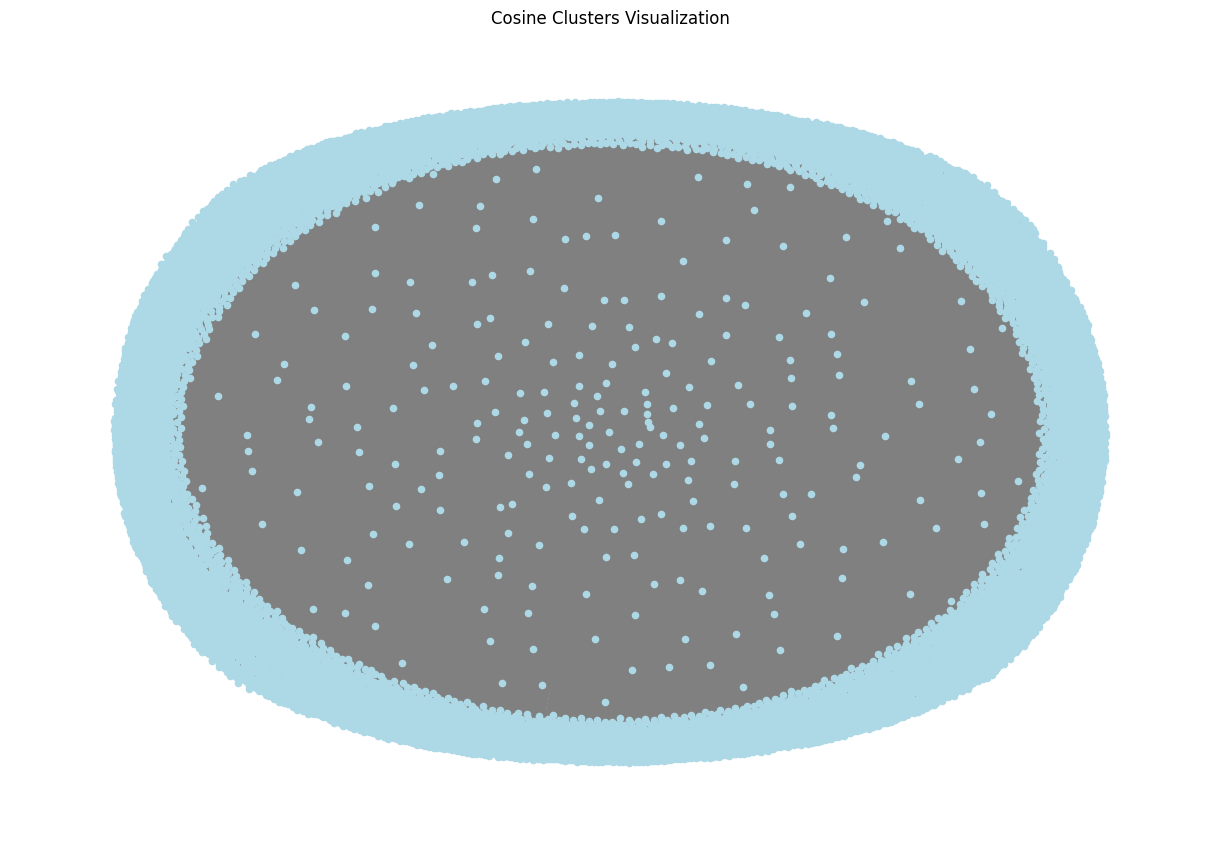

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load clusters.json
with open("clusters.json", "r") as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Recursive function to add nodes and edges
def add_edges(node, parent=None):
    if "name" in node:
        G.add_node(node["name"])
        if parent:
            G.add_edge(parent, node["name"])

    if "children" in node:
        for child in node["children"]:
            add_edges(child, node["name"])

# Start adding nodes from the root
add_edges(data)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes dynamically
nx.draw(G, pos, node_color="lightblue", edge_color="gray", node_size=20)

plt.title("Cosine Clusters Visualization")
plt.show()


## Edit Distance

In [ ]:
!python ./tika-similarity/tikasimilarity/distance/edit-value-similarity.py --inputDir ./JSON/ --outCSV ./ED_Sim.csv

Accepting all MIME Types.....
2025-03-13 18:52:42,050 [MainThread  ] [WARNI]  Tika server returned status: 503
Traceback (most recent call last):
  File "/content/./tika-similarity/tikasimilarity/distance/edit-value-similarity.py", line 268, in <module>
    computeScores(args.inputDir, args.outCSV, args.accept, args.allKeys)
  File "/content/./tika-similarity/tikasimilarity/distance/edit-value-similarity.py", line 76, in computeScores
    intersect_features = set(file1_parsedData["metadata"].keys()) & set(file2_parsedData["metadata"].keys()) 
                                                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'keys'


In [ ]:
!python ./tika-similarity/tikasimilarity/cluster/edit-cosine-cluster.py --inputCSV ./ED_Sim.csv --cluster 2

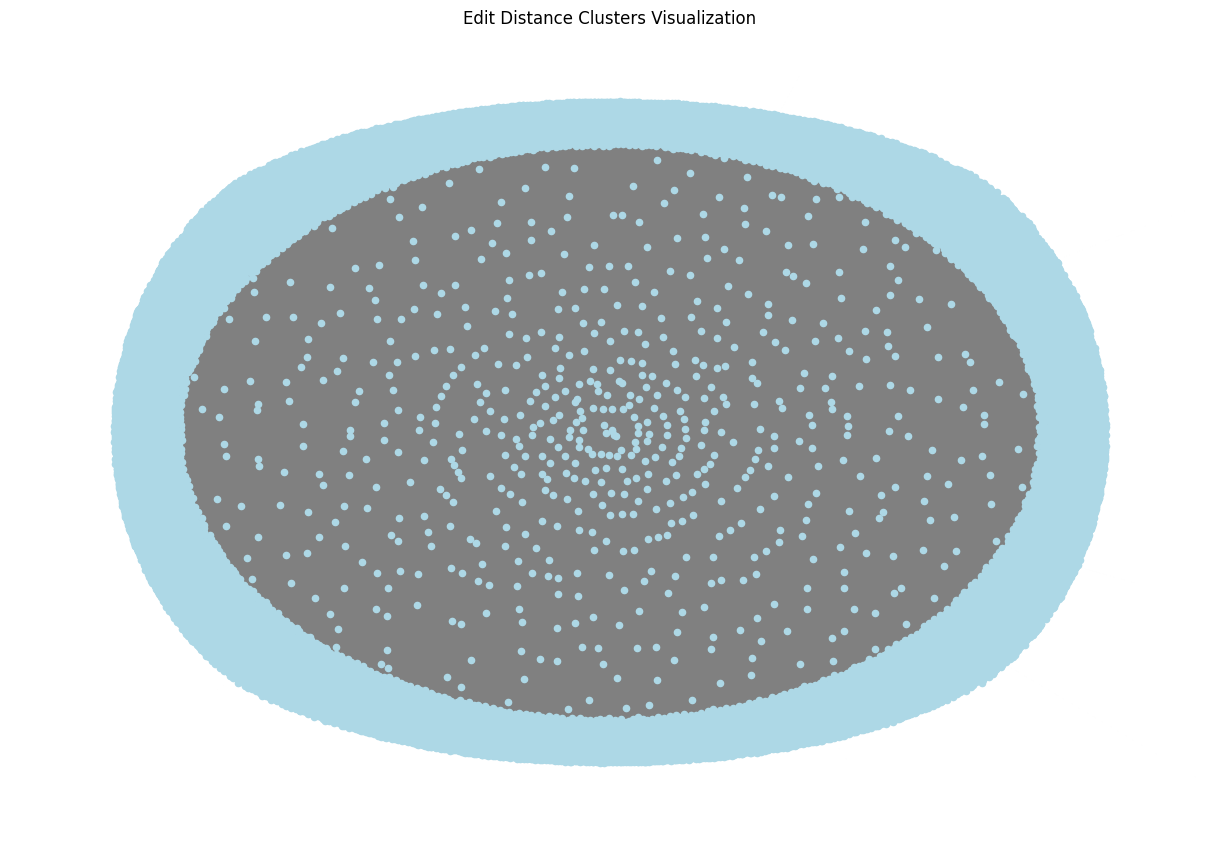

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load clusters.json
with open("clusters.json", "r") as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Recursive function to add nodes and edges
def add_edges(node, parent=None):
    if "name" in node:
        G.add_node(node["name"])
        if parent:
            G.add_edge(parent, node["name"])

    if "children" in node:
        for child in node["children"]:
            add_edges(child, node["name"])

# Start adding nodes from the root
add_edges(data)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes dynamically
nx.draw(G, pos, node_color="lightblue", edge_color="gray", node_size=20)

plt.title("Edit Distance Clusters Visualization")
plt.show()


In [ ]:
!python ./tika-similarity/tikasimilarity/cluster/edit-cosine-circle-packing.py --inputCSV ./ED_Sim.csv --cluster 2

In [ ]:
import json
import plotly.express as px

# Load circle.json
with open("circle.json", "r") as f:
    data = json.load(f)

# Recursive function to convert JSON into a list of dictionaries for Plotly
def extract_nodes(node, parent_name=""):
    nodes = []
    name = node.get("name", "root")

    # If "size" exists, it's a leaf node
    size = node.get("size", 1)  # Default to 1 if not present

    nodes.append({"id": name, "parent": parent_name, "size": size})

    if "children" in node:
        for child in node["children"]:
            nodes.extend(extract_nodes(child, parent_name=name))

    return nodes

# Convert JSON into a list of nodes
nodes_data = extract_nodes(data)

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(nodes_data)

# Create Circle Packing chart
fig = px.treemap(
    df,
    names="id",
    parents="parent",
    values="size",
    color="size",
    color_continuous_scale="blues"
)

# Update layout for a circular appearance
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    title="Circle Packing Visualization",
    margin=dict(t=10, l=10, r=10, b=10),
)

# Show interactive plot
fig.show()


In [ ]:
# import json
# import networkx as nx
# import plotly.graph_objects as go

# # Load clusters.json
# with open("clusters.json", "r") as f:
#     data = json.load(f)

# # Create a directed graph
# G = nx.DiGraph()

# # Recursive function to add nodes and edges
# def add_edges(node, parent=None):
#     if "name" in node:
#         G.add_node(node["name"])
#         if parent:
#             G.add_edge(parent, node["name"])

#     if "children" in node:
#         for child in node["children"]:
#             add_edges(child, node["name"])

# # Start adding nodes from the root
# add_edges(data)

# # Use spring layout for positioning
# pos = nx.spring_layout(G, seed=42)

# # Extract node positions and labels
# edge_x, edge_y = [], []
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.extend([x0, x1, None])
#     edge_y.extend([y0, y1, None])

# # Create edges as lines
# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color="gray"),
#     hoverinfo="none",
#     mode="lines"
# )

# # Create nodes
# node_x, node_y, node_text = [], [], []
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     node_text.append(node)  # Label with the node name

# # Create node trace with hover labels
# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode="markers",
#     hoverinfo="text",
#     marker=dict(
#         size=8,
#         color="lightblue",
#         line=dict(width=1, color="black")
#     )
# )

# # Create figure
# fig = go.Figure(data=[edge_trace, node_trace])
# fig.update_layout(
#     title="Interactive Edit Distance Clusters",
#     showlegend=False,
#     hovermode="closest",
#     margin=dict(b=0, l=0, r=0, t=40),
#     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
# )

# # Show interactive plot
# fig.show()


In [ ]:
# import json
# import networkx as nx
# import plotly.graph_objects as go
# import numpy as np

# # Load clusters.json
# with open("clusters.json", "r") as f:
#     data = json.load(f)

# # Create a directed graph
# G = nx.DiGraph()

# # Recursive function to add nodes and edges
# def add_edges(node, parent=None):
#     if "name" in node:
#         G.add_node(node["name"])
#         if parent:
#             G.add_edge(parent, node["name"])

#     if "children" in node:
#         for child in node["children"]:
#             add_edges(child, node["name"])

# # Start adding nodes from the root
# add_edges(data)

# # Use a shell (radial) layout
# pos = nx.shell_layout(G)  # Arranges nodes in concentric circles

# # Extract edges for plotting
# edge_x, edge_y = [], []
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.extend([x0, x1, None])
#     edge_y.extend([y0, y1, None])

# # Create edges as lines
# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=1, color="gray"),
#     hoverinfo="none",
#     mode="lines"
# )

# # Create nodes
# node_x, node_y, node_text = [], [], []
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     node_text.append(node)  # Label with the node name

# # Create node trace with hover labels
# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode="markers",
#     hoverinfo="text",
#     marker=dict(
#         size=8,
#         color="lightblue",
#         line=dict(width=1, color="black")
#     )
# )

# # Create figure
# fig = go.Figure(data=[edge_trace, node_trace])
# fig.update_layout(
#     title="Radial Tree of Edit Distance Clusters",
#     showlegend=False,
#     hovermode="closest",
#     margin=dict(b=0, l=0, r=0, t=40),
#     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
# )

# # Show interactive radial tree
# fig.show()
